## **Import important libraries and read the dataset**

In [ ]:
!unzip "workspace/dataset_a.csv" -d "/content"
!unzip "workspace/dataset_bc.csv" -d "/content"

/bin/bash: line 1: unzip: command not found
/bin/bash: line 1: unzip: command not found


In [ ]:
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


/srv/conda/envs/saturn/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.manifold import TSNE
plt.rcParams["figure.figsize"] = (10,5)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import xgboost
xgboost.__version__

'1.5.1'

In [ ]:
df_1 = pd.read_csv('dataset_a.csv')
df_1.head()

,labelnew,abc,traintest,datetime,node,interfaces_interfaces-state_interface_statistics_in-octets,interfaces_interfaces-state_interface_statistics_in-unicast-pkts,interfaces_interfaces-state_interface_statistics_in-broadcast-pkts,interfaces_interfaces-state_interface_statistics_in-multicast-pkts,interfaces_interfaces-state_interface_statistics_in-discards,...,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_sirq,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_name.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_user.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_system.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_nice.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_idle.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_irq.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_sirq.1,software-oper_cisco-platform-software_control-processes_control-process_per-core-stats_per-core-stat_io-wait.1
0,0,a,0,20210128174440,amfa1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,1.0,0.20,0.20,0.0,99.19,0.0,0.0,0.40
1,0,a,0,20210128174450,amfa1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.09,1.0,0.73,0.36,0.0,98.63,0.0,0.0,0.27
2,0,a,0,20210128174500,amfa1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.22,1.0,1.11,0.44,0.0,98.22,0.0,0.0,0.22
3,0,a,0,20210128174510,amfa1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,1.0,0.60,0.30,0.0,99.00,0.0,0.1,0.00
4,0,a,0,20210128174520,amfa1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.37,1.0,1.10,0.37,0.0,98.53,0.0,0.0,0.00


In [ ]:
import numpy as np
X_test = np.loadtxt('01_a_test_data.txt')
y_test = np.loadtxt('01_a_test_label.txt', dtype='int64')
X_train_a = np.loadtxt('01_a_train_data.txt')
y_train_a = np.loadtxt('01_a_train_label.txt', dtype='int64')
    
X_test_a = np.loadtxt('01_a_test_data.txt')
y_test_a = np.loadtxt('01_a_test_label.txt', dtype='int64')
    
X_train_c = np.loadtxt('01_c_train_data.txt')
y_train_c = np.loadtxt('01_c_train_label.txt', dtype='int64')
    
X_test_c = np.loadtxt('01_c_test_data.txt')
y_test_c = np.loadtxt('01_c_test_label.txt', dtype='int64')
    
X_train = np.concatenate([X_train_a, X_train_c])
y_train = np.concatenate([y_train_a, y_train_c])

In [ ]:
X_train.shape

(187020, 33)

In [ ]:
columns_name = ['memory_status_1','memory_status_2','memory_status_3',
                'in_octets_1','in_octets_2','in_octets_3',
                'out_octets_1','out_octets_2','out_octets_3',
               'oper_status_1' ,'oper_status_2','oper_status_3',
                'used_precent_1','used_precent_2','used_precent_3',
                'user_1','user_2','user_3','user_4','user_5','user_6',
                'system_1','system_2','system_3','system_4','system_5','system_6',
                'idle_1','idle_2','idle_3','idle_4','idle_5','idle_6']

In [ ]:
X_train = pd.DataFrame(X_train,columns = columns_name)
X_train

,memory_status_1,memory_status_2,memory_status_3,in_octets_1,in_octets_2,in_octets_3,out_octets_1,out_octets_2,out_octets_3,oper_status_1,...,system_3,system_4,system_5,system_6,idle_1,idle_2,idle_3,idle_4,idle_5,idle_6
0,0.0,0.0,0.0,2.690996e+09,3.319806e+09,5.962709e+09,3.390005e+09,3.272843e+09,5.785647e+09,0.55,...,1.0000,1.01,0.30,0.9848,0.0,0.49,0.0,0.60,0.0,0.33
1,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+03,0.000000e+00,0.50,...,0.9841,0.20,0.10,0.9950,0.0,0.49,0.0,0.60,0.0,0.33
2,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776000e+03,0.000000e+00,0.40,...,0.9990,1.40,0.20,0.9820,0.0,0.49,0.0,0.60,0.0,0.33
3,0.0,0.0,0.0,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,1.596000e+03,0.000000e+00,0.50,...,1.0000,1.60,0.40,0.9770,0.0,0.49,0.0,0.60,0.0,0.33
4,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+03,0.000000e+00,0.51,...,0.9927,0.64,0.00,0.9890,0.0,0.49,0.0,0.60,0.0,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187015,0.0,0.0,0.0,9.690000e+03,1.174800e+04,2.207400e+04,1.197000e+04,1.010400e+04,2.143800e+04,1.10,...,0.9929,1.31,0.71,0.9747,0.0,0.31,0.0,0.31,0.0,0.31
187016,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.50,...,0.9960,1.38,0.40,0.9822,0.0,0.31,0.0,0.31,0.0,0.31
187017,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.60,...,0.9970,1.11,0.20,0.9869,0.0,0.31,0.0,0.31,0.0,0.31
187018,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.20,...,0.9950,1.39,0.30,0.9831,0.0,0.31,0.0,0.31,0.0,0.31


In [ ]:
X_test = pd.DataFrame(X_test,columns = columns_name)
X_test

,memory_status_1,memory_status_2,memory_status_3,in_octets_1,in_octets_2,in_octets_3,out_octets_1,out_octets_2,out_octets_3,oper_status_1,...,system_3,system_4,system_5,system_6,idle_1,idle_2,idle_3,idle_4,idle_5,idle_6
0,0.0,0.0,0.0,3.313050e+09,4.094691e+09,7.399217e+09,4.183427e+09,4.022139e+09,7.181872e+09,0.40,...,1.0000,1.10,0.6,0.9801,0.0,0.37,0.0,0.34,0.0,0.32
1,0.0,0.0,0.0,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,1.818000e+03,0.000000e+00,0.49,...,0.9930,0.90,0.1,0.9880,0.0,0.37,0.0,0.34,0.0,0.32
2,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.554000e+03,0.000000e+00,0.10,...,1.0000,1.11,0.4,0.9819,0.0,0.37,0.0,0.34,0.0,0.32
3,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+03,0.000000e+00,0.81,...,0.9990,1.50,0.2,0.9800,0.0,0.37,0.0,0.34,0.0,0.32
4,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776000e+03,0.000000e+00,0.90,...,1.0000,1.11,0.2,0.9839,0.0,0.37,0.0,0.34,0.0,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23355,0.0,0.0,0.0,1.552600e+04,1.843200e+04,3.530400e+04,1.920000e+04,1.795400e+04,3.395800e+04,1.22,...,0.9692,0.89,0.3,0.9881,0.0,0.39,0.0,0.44,0.0,0.32
23356,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776000e+03,0.000000e+00,0.40,...,0.9900,0.70,0.2,0.9910,0.0,0.39,0.0,0.44,0.0,0.32
23357,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.554000e+03,0.000000e+00,0.10,...,0.9950,1.50,0.3,0.9820,0.0,0.39,0.0,0.44,0.0,0.32
23358,0.0,0.0,0.0,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,1.892000e+03,0.000000e+00,0.00,...,0.9900,0.60,0.2,0.9920,0.0,0.39,0.0,0.44,0.0,0.32


In [ ]:
X_test.dtypes

memory_status_1    float64
memory_status_2    float64
memory_status_3    float64
in_octets_1        float64
in_octets_2        float64
in_octets_3        float64
out_octets_1       float64
out_octets_2       float64
out_octets_3       float64
oper_status_1      float64
oper_status_2      float64
oper_status_3      float64
used_precent_1     float64
used_precent_2     float64
used_precent_3     float64
user_1             float64
user_2             float64
user_3             float64
user_4             float64
user_5             float64
user_6             float64
system_1           float64
system_2           float64
system_3           float64
system_4           float64
system_5           float64
system_6           float64
idle_1             float64
idle_2             float64
idle_3             float64
idle_4             float64
idle_5             float64
idle_6             float64
dtype: object

In [ ]:
def plot_tsne(X, y, target_names,title):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(X)
    
    target_ids = range(len(target_names))

    plt.figure(figsize=(9, 7))
    colors = 'r', 'g', 'b', 'c', 'm', 'y'
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
    
    plt.title(title)
    plt.legend()
    plt.show()

## **Develop baseline models**

In [ ]:
def baseline_model(model,X_train,y_train,X_test):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    return model_pred


In [ ]:
def model_information(model_pred,y_test,title):
 
    print(accuracy_score(y_test, model_pred))
    print(classification_report(y_test, model_pred))
    # print(confusion_matrix(y_test,  model_pred))
    
    cm = confusion_matrix(y_test, model_pred, labels=[0,1,2,3,4,5])
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5])
    disp.plot()
    plt.title(title)
    plt.show()
    pass


##  **1- Apply xgboost model**


In [ ]:
#create the model 
Model1_xgboost=XGBClassifier(random_state=42)

In [ ]:
# Model1_xgboost_pred=baseline_model(Model1_xgboost,X_train,y_train,X_test)

[19:20:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
%%time 
Model1_xgboost_pred=baseline_model(Model1_xgboost,X_train,y_train,X_test)

[07:15:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 5min 23s, sys: 6.47 s, total: 5min 29s
Wall time: 43.2 s


0.9645976027397261
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     21900
           1       0.81      0.71      0.76       308
           2       0.35      1.00      0.52       287
           3       0.84      0.38      0.53       280
           4       1.00      1.00      1.00       291
           5       1.00      0.98      0.99       294

    accuracy                           0.96     23360
   macro avg       0.83      0.84      0.80     23360
weighted avg       0.98      0.96      0.97     23360

[[21342    24   519    15     0     0]
 [   85   218     0     5     0     0]
 [    0     0   287     0     0     0]
 [  146    27     0   107     0     0]
 [    0     0     1     0   290     0]
 [    0     0     5     0     0   289]]


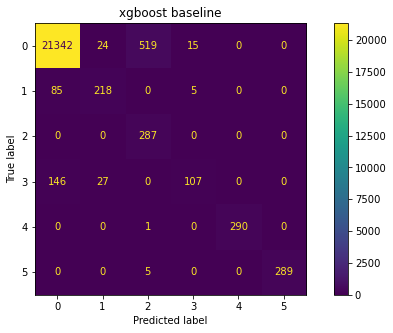

In [ ]:
model_information(Model1_xgboost_pred,y_test,"xgboost baseline")

In [ ]:
target_names=[0,1,2,3,4,5]

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components= 2 ,random_state=0)
z = tsne.fit_transform(X_train)


In [ ]:
z_x_test = tsne.fit_transform(X_test)


In [ ]:
Model1_xgboost=XGBClassifier(random_state=42)

In [ ]:
Model1_xgboost.fit(z,y_train)

[21:19:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
Model1_xgboost_pred=Model1_xgboost.predict(z)

In [ ]:
# !pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 80.4 MB/s eta 0:00:0000:0100:01


In [ ]:
# import matplotlib.pyplot as plt
# import plotly.express as px

In [ ]:
%matplotlib inline

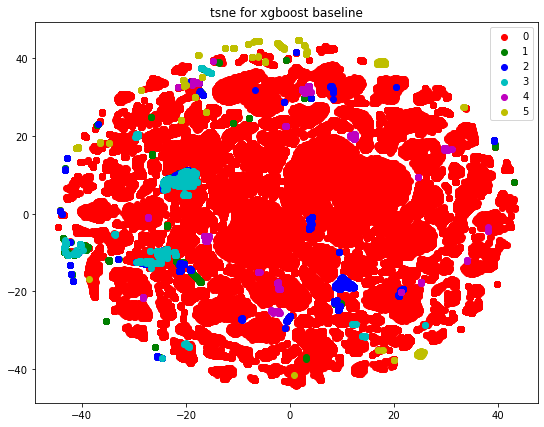

In [ ]:
plot_tsne(X_train,Model1_xgboost_pred, target_names,"tsne for xgboost baseline")

## **2- Appy Logistic Regression model** 


In [ ]:
from sklearn.linear_model import LogisticRegression

0.9363013698630137
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     21900
           1       0.00      0.00      0.00       308
           2       0.30      0.06      0.10       287
           3       0.39      0.07      0.12       280
           4       0.00      0.00      0.00       291
           5       0.00      0.00      0.00       294

    accuracy                           0.94     23360
   macro avg       0.27      0.19      0.20     23360
weighted avg       0.89      0.94      0.91     23360

[[21836     5    12    27    15     5]
 [  287     0    21     0     0     0]
 [  267     0    17     3     0     0]
 [  245     3     7    19     5     1]
 [  291     0     0     0     0     0]
 [  294     0     0     0     0     0]]


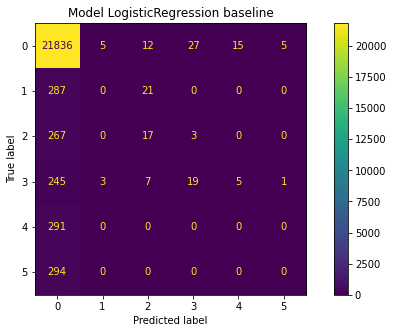

In [ ]:
Model2_LogisticRegression=LogisticRegression(multi_class='auto',random_state=42)
Model2_LogisticRegression_pred=baseline_model(Model2_LogisticRegression,X_train,y_train,X_test)
model_information(Model2_LogisticRegression_pred,y_test,"Model LogisticRegression baseline")


## **3- Apply Naive Bayes model**


In [ ]:
from sklearn.naive_bayes import GaussianNB

0.02658390410958904
              precision    recall  f1-score   support

           0       0.91      0.01      0.02     21900
           1       0.00      0.00      0.00       308
           2       0.02      0.88      0.03       287
           3       0.03      0.15      0.05       280
           4       0.01      0.22      0.03       291
           5       0.01      0.05      0.01       294

    accuracy                           0.03     23360
   macro avg       0.16      0.22      0.02     23360
weighted avg       0.85      0.03      0.02     23360

[[  249     0 14551  1418  4150  1532]
 [    0     0   281     8    13     6]
 [    0     0   252    12    18     5]
 [    0     0   191    43    32    14]
 [   14     0   176    15    63    23]
 [   11     0   179    22    68    14]]


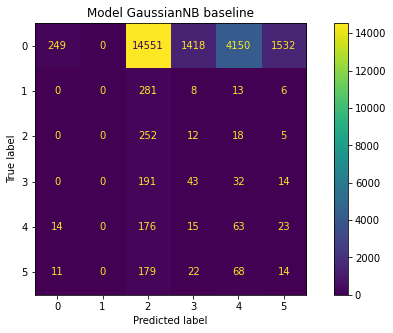

In [ ]:
Model3_gnb = GaussianNB()
Model3_gnb_pred=baseline_model(Model3_gnb,X_train,y_train,X_test)
model_information(Model3_gnb_pred,y_test,"Model GaussianNB baseline")

## **4- Apply Random Forest model**


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
Mode4_RFC = RandomForestClassifier(random_state=42)


In [ ]:
%%time
Mode4_RFC_pred=baseline_model(Mode4_RFC,X_train,y_train,X_test)


CPU times: user 1min 7s, sys: 7.48 ms, total: 1min 7s
Wall time: 1min 7s


0.9621147260273972
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     21900
           1       0.83      0.57      0.67       308
           2       0.36      1.00      0.53       287
           3       0.93      0.25      0.40       280
           4       1.00      1.00      1.00       291
           5       1.00      1.00      1.00       294

    accuracy                           0.96     23360
   macro avg       0.85      0.80      0.76     23360
weighted avg       0.97      0.96      0.96     23360

[[21357    21   519     3     0     0]
 [  131   175     0     2     0     0]
 [    0     0   287     0     0     0]
 [  193    16     0    71     0     0]
 [    0     0     0     0   291     0]
 [    0     0     0     0     0   294]]


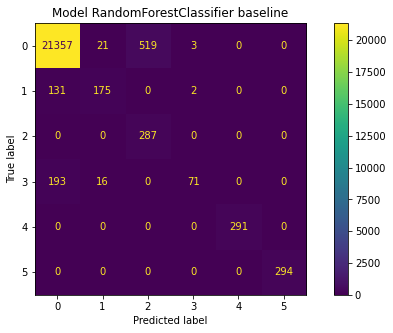

In [ ]:
model_information(Mode4_RFC_pred,y_test,"Model RandomForestClassifier baseline")

## **Hyperparameter tunning of champion model (XGBOOST)** 

In [ ]:
fin_xgboost = XGBClassifier( eta = 0.3,max_depth= 15, min_child_weight=6, subsample=0.9, colsample_bytree=0.7,seed=0,eval_metric='mlogloss')
fin_xgboost.fit(X_train, y_train,verbose=True)

XGBClassifier(colsample_bytree=0.7, eta=0.3, eval_metric='mlogloss',
              max_depth=15, min_child_weight=6, objective='multi:softprob',
              seed=0, subsample=0.9)

0.9657106164383562
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     21900
           1       0.83      0.72      0.77       308
           2       0.36      1.00      0.53       287
           3       0.88      0.42      0.57       280
           4       1.00      1.00      1.00       291
           5       1.00      1.00      1.00       294

    accuracy                           0.97     23360
   macro avg       0.84      0.85      0.81     23360
weighted avg       0.98      0.97      0.97     23360

[[21348    20   519    12     1     0]
 [   82   222     0     4     0     0]
 [    0     0   287     0     0     0]
 [  136    27     0   117     0     0]
 [    0     0     0     0   291     0]
 [    0     0     0     0     0   294]]


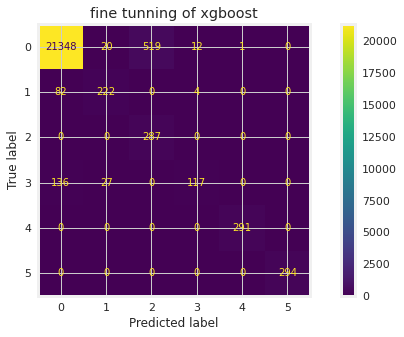

In [ ]:
fin_test_pred = fin_xgboost.predict(X_test)
print(accuracy_score(y_test, fin_test_pred))
print(classification_report(y_test, fin_test_pred))
cm = confusion_matrix(y_test, fin_test_pred, labels=[0,1,2,3,4,5])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5])
disp.plot()
plt.title("fine tunning of xgboost")
plt.show()

In [ ]:
fin_xgboost = XGBClassifier( eta = 0.3,max_depth= 15, min_child_weight=6, subsample=0.9, colsample_bytree=0.7,seed=0,eval_metric='mlogloss')
fin_xgboost.fit(z, y_train,verbose=True)
fin_test_pred = fin_xgboost.predict(z)


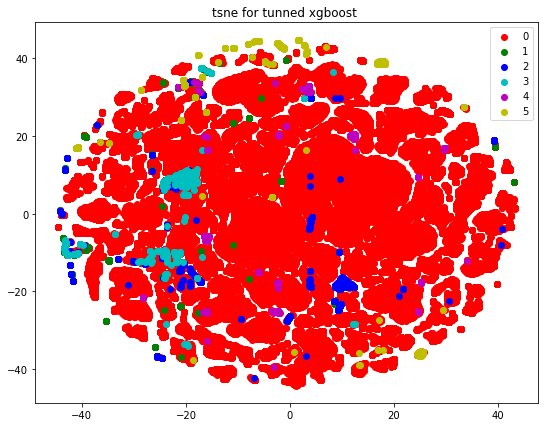

In [ ]:
plot_tsne(X_train,fin_test_pred, target_names,"tsne for tunned xgboost ")

## **Save the best model**

In [ ]:
import joblib 
joblib.dump(fin_xgboost,'model.pkl')

['model.pkl']

In [ ]:
model = joblib.load('model.pkl')

In [ ]:
model.predict(pd.DataFrame({'memory_status_1':[0.0],'memory_status_2':[0.0],'memory_status_3':[0.0],
                'in_octets_1':[52155151],'in_octets_2':[113221316],'in_octets_3':[51531351],
                'out_octets_1':[51351635],'out_octets_2':[5131531],'out_octets_3':[35151531],
               'oper_status_1':[0.9] ,'oper_status_2':[0.8],'oper_status_3':[0.7],
                'used_precent_1':[0.5],'used_precent_2':[0.9],'used_precent_3':[0.8],
                'user_1':[0.0],'user_2':[0.0],'user_3':[0.5],'user_4':[0.2],'user_5':[0.5],'user_6':[0.7],
                'system_1':[0.8],'system_2':[0.8],'system_3':[0.8],'system_4':[0.8],'system_5':[0.5],'system_6':[0.8],
                'idle_1':[0.8],'idle_2':[0.9],'idle_3':[1.1],'idle_4':[1.0],'idle_5':[2.2],'idle_6':[2.3]}))

array([4])

In [ ]:
classifier=joblib.load('model.pkl')
def predict_Network_Failure(f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33):
  prediction=classifier.predict(pd.DataFrame({'memory_status_1':[f1],'memory_status_2':[f2],'memory_status_3':[f3],
                'in_octets_1':[f4],'in_octets_2':[f5],'in_octets_3':[f6],
                'out_octets_1':[f7],'out_octets_2':[f8],'out_octets_3':[f9],
               'oper_status_1':[f10] ,'oper_status_2':[f11],'oper_status_3':[f12],
                'used_precent_1':[f13],'used_precent_2':[f14],'used_precent_3':[f15],
                'user_1':[f16],'user_2':[f17],'user_3':[f18],'user_4':[f19],'user_5':[f20],'user_6':[f21],
                'system_1':[f22],'system_2':[f23],'system_3':[f24],'system_4':[f25],'system_5':[f26],'system_6':[f27],
                'idle_1':[f28],'idle_2':[f29],'idle_3':[f30],'idle_4':[f31],'idle_5':[f32],'idle_6':[f33]}))
  label = ['normal','bridge-delif','interface-down','interface-loss-start','memory-stress-start','vcpu-overload-start']
  return label[prediction[0]]

In [ ]:
predict_Network_Failure(0,0,0,6516545,5465465,5154546,513545,646546456,564414641,0.2,0.3,0.4,0.5,0.6,0.08,0.5,0.6,0.2,0,0,0.2,0.1,0.9,0.9,0.2,0,0,0,0.3,0.6,0.5,0.4,0.3)

'normal'